In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <b> Project Title : EDSA - Climate Change Belief Analysis 2021 </u></b>

###  Objective: Predict an individual’s belief in climate change based on historical tweet data

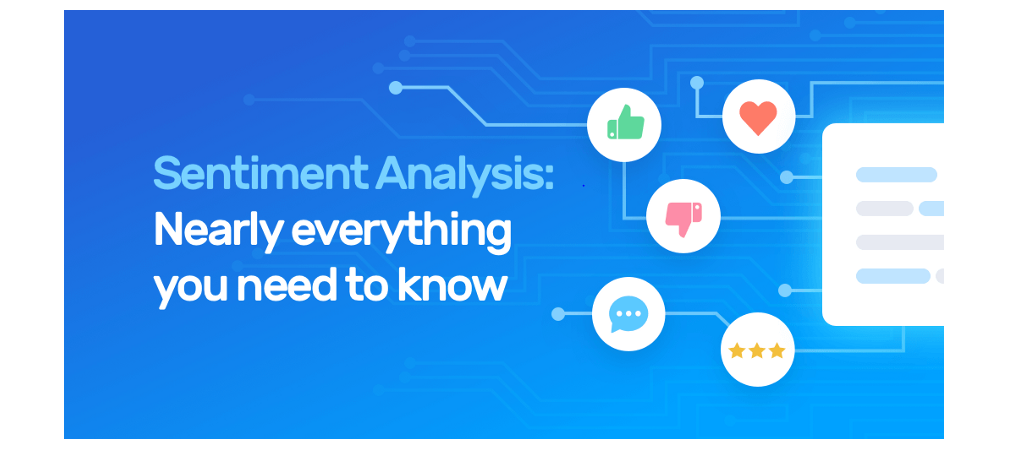

# <u><b> Authors :- 
## Iddo Smith 👨‍💻 💻 
## Katleho Moketo 👨‍💻 💻 
## Maxwell Munzhedzi 👨‍💻 💻 
## Precious Chauke 👩‍💻 💻 
## Richard Malahlela 👨‍💻 💻 

# <u> **Data Description**

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

**Class Description:**

* **2 News:** the tweet links to factual news about climate change 
* **1 Pro:** the tweet supports the belief of man-made climate change 
* **0 Neutral:** the tweet neither supports nor refutes the belief of man-made climate change 
* **-1 Anti:** the tweet does not believe in man-made climate change 

**Variable definitions:**
**Columns:**

* **sentiment:** Sentiment of tweet 
* **message:** Tweet body 
* **tweetid:** Twitter unique id 

**Files available for download:**
* **train.csv** - You will use this data to train your model. 
* **test.csv** - You will use this data to test your model. 
* **SampleSubmission.csv** - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

# <u><b>                              ------- @TEAM CLASSIFICATION AM5 DSFT21 --------

# <u><b>Workflow

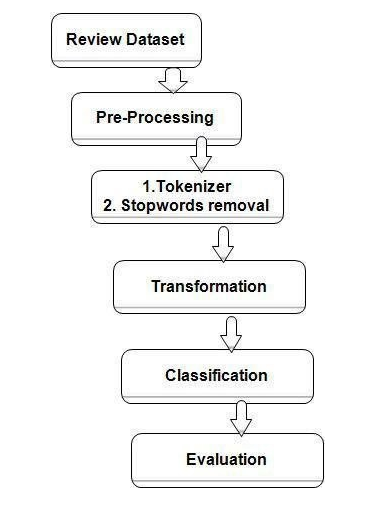

# <u><b>IMPORTS

In [52]:
import pandas as pd
import numpy as np
import spacy
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
special = string.punctuation 
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

#Importing other libraries
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim
from fastai.text.all import *
from collections import defaultdict
from collections import  Counter
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
additional  = ['retweet']
stop = set().union(stopwords.words('english'),additional)
import nltk
nltk.download('wordnet')

# Downloads
#nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       dat

# <u><b>LOAD DATA 

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)

(15819, 3)
(10546, 2)


# <u><b> REVIEWING OUR DATASET

In [4]:
train_df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [6]:
train_df.shape

(15819, 3)

In [7]:
# There are 4 unique sentiment types in our dataset
train_df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### <u><b> Going deeper into tweet and sentiment.

In [8]:
train_df[train_df['sentiment']==1]

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577
...,...,...,...
15807,1,"#scottpruit climate change comments would be like NASA saying, 'The moon landing is complicated, a hoax or not? further study is needed.”",447067
15811,1,RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦,426353
15812,1,RT @SierraClub: 2016: hottest year in history. Also in 2016: 182 Members of Congress denied climate change is real. https://t.co/XMOvALz3c9…,989478
15813,1,RT @thinkprogress: EPA head falsely claims carbon emissions aren’t the cause of global warming\r\nhttps://t.co/owbqKlSyMx https://t.co/i19vAgE…,442853


In [9]:
train_df[train_df['sentiment']==2]

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
12,2,"RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…",454673
14,2,"Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX",658092
26,2,Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg,365291
32,2,RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…,143471
...,...,...,...
15802,2,Michael Bloomberg to world leaders: ignore Trump on climate change https://t.co/XcuD4Ph6py,585908
15803,2,"Suicides of nearly 60,000 Indian farmers linked to climate change, study claims\r\n\r\nhttps://t.co/XWXMx5h4U5",296403
15805,2,RT @GrindTV: New head of EPA says climate change not caused primarily by carbon dioxide https://t.co/Kl8fcjGOeL,830383
15809,2,The quest to capture and store carbon — and slow climate change — just reached a new milestone… https://t.co/O1jLyeqLgt,705048


In [10]:
train_df[train_df['sentiment']==0]

,sentiment,message,tweetid
19,0,Calum: *tweets abt reunitingish w the cast*\r\n-sees replies begging him to come to their countries-\r\nCalum: *goes back to rting climate change*,547924
22,0,"we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj",67545
30,0,@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice,365051
39,0,We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda,403368
43,0,"RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real",326916
...,...,...,...
15797,0,"@realDonaldTrump Damn China &amp; their climate change conspiracy. Frack baby, frack! @BernieSanders @ProgressiveIA @SenSanders @People4Bernie",650825
15808,0,RT @ThePowersThatBe: Now if she could only be convinced that hyperbole is a leading cause of global warming https://t.co/yyVUHdpSE2,127777
15810,0,This global warming so late in the season is pretty annoying ��,572819
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248


In [11]:
train_df[train_df['sentiment']==-1]

,sentiment,message,tweetid
28,-1,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491
46,-1,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141
48,-1,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\r\nHow's his maid...illegal or\r\nhttp…,768263
...,...,...,...
15704,-1,RT @dbongino: We're at the point w/the delusional Left that literally every weather event is evidence of 'global warming.' Their dishonesty…,890582
15705,-1,RT @joshdcaplan: Al Gore admits Paris Accord won't solve the issue of 'climate change.'\r\n\r\nYet liberals say Trump pulling out will des…,380307
15711,-1,"RT @JoshNoneYaBiz: Funny the same people who believe in climate change bc of science, cant accept that you're biologically male or female.…",390339
15806,-1,"RT @HerberMp: @sness5561_ness Al Gore is a idiot! He thinks climate change is the cause of all our problems. Always has, always w…",213863


# <u><b> UTILS:
#### The Utils part: containing functions that will be useful for the whole kernel. The functions are in the order :
    
#### * ***Concat :*** used to concatenate train and test to avoid redundancy in the data clean
#### * ***divide_df :*** function used to separate the train and the test after the data clean
#### * ***List of words :*** function that returns the list of words that form the tweets
#### * ***List_of_tweets :*** function that returns the list of all the tweets

In [12]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(df_all,train_len):
    return df_all.loc[:train_len-1], df_all.loc[train_len:].drop('sentiment',axis=1)

from tqdm import tqdm 
def List_of_words(df): 
    words = [word for tweet in tqdm(df['message']) for word in tweet.split()]
    return words

def List_of_tweets(df):
    tweets = [tweet for tweet in tqdm(df['message']) ]
    return tweets

# <u><b> DATA ANOMALY DETECTION

#### <b>Detecting the mislabeled tweets ( Tweets with either having a sentiment of greater than 2 or less than negative 1)

#### There are 0 unique tweets in training set which are labeled differently

In [13]:
def mislabeled_tweets (train) : # function that returns mislabeled labeled tweets
    df_mislabeled = train.groupby(['message']).nunique().sort_values(by='sentiment', ascending=False)
    df1_mislabeled = df_mislabeled[df_mislabeled['sentiment'] < -1]['sentiment']
    df2_mislabeled = df_mislabeled[df_mislabeled['sentiment'] > 2]['sentiment']
    return (df1_mislabeled.index.tolist(),df2_mislabeled.index.tolist()) 

mislabeled_tweets(train_df)

([], [])

#### <b>There are no duplicate rows

In [14]:
#Now we check for any duplicates in our train data 
duplicateRowsDF = train_df[train_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [sentiment, message, tweetid]
Index: []


# Exploratory data analysis

#### We will start by checking if our data has missing values

,Total,Percent
message,0,0.0
tweetid,0,0.0


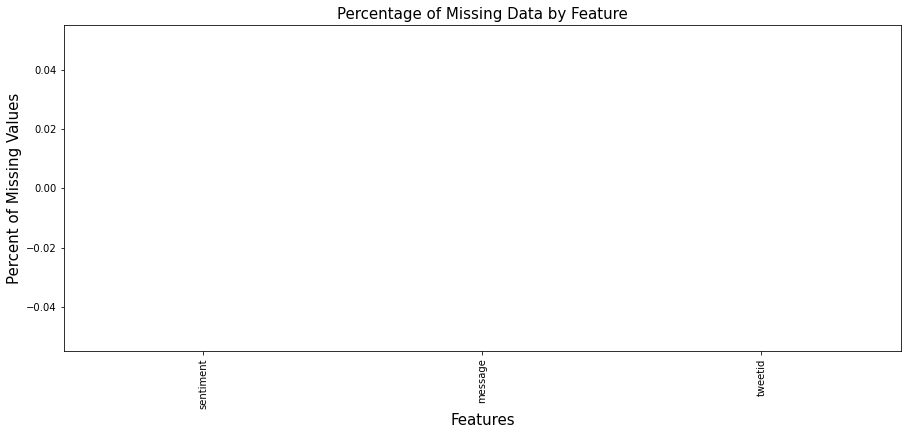

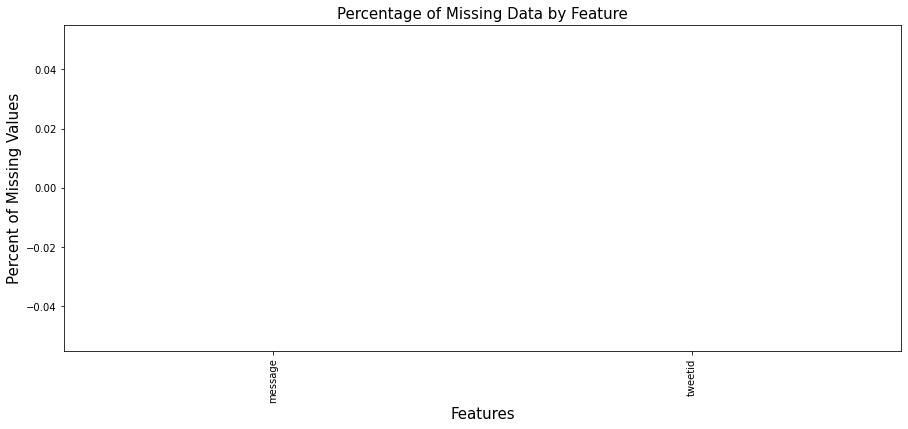

In [15]:
# function to return missing values
def missing_values(df): 
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of Missing Values', fontsize=15)
    plt.title('Percentage of Missing Data by Feature', fontsize=15)
    return (missing_data)

missing_values(train_df)
missing_values(test_df)

#### Yey, We have no missing values. Both training and test set have same ratio of missing values in all features.

#### Plotting the percentage of Sentimentals (2,1,0 & -1) using Pie chart and Bar graph

In [16]:
# function to plot the target _ distribution
def target_distribution (train) : 
    fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
    plt.tight_layout()

    train.groupby('sentiment').count()['tweetid'].plot(kind='pie', ax=axes[0], labels=['-1','0','1','2'],autopct='%.0f%%')
    sns.countplot(x=train['sentiment'], hue=train['sentiment'], ax=axes[1])

    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticklabels(['-1','0','1','2'])
    axes[0].tick_params(axis='x', labelsize=15)
    axes[0].tick_params(axis='y', labelsize=15)
    axes[1].tick_params(axis='x', labelsize=15)
    axes[1].tick_params(axis='y', labelsize=15)

    axes[0].set_title('Target Distribution in Training Set', fontsize=13)
    axes[1].set_title('Target Count in Training Set', fontsize=13)

    plt.show()

### Target distribution percentages info
 - 54% of our tweets shows that they believe in man-made climate change(Pro = 1)
 - 23% of our tweets shows the news about man-made climate change(News = 2)
 - 15% of our tweets shows that they neither believe or do not believe in man-made climate change (Neutral = 0)
 - 8% of our tweets show that they do not believe in man-made climate change(Anti = -1)

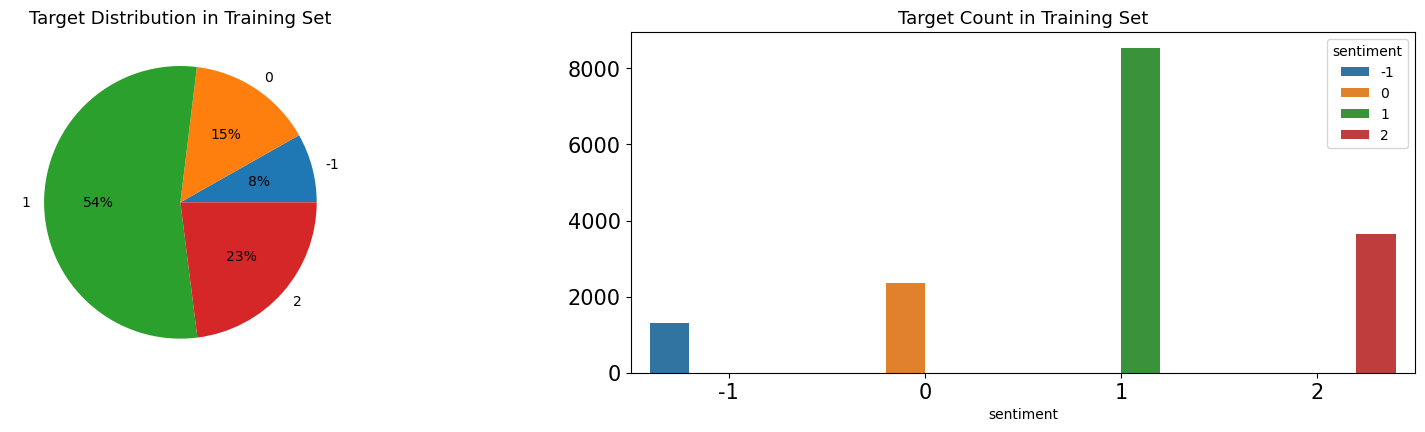

In [17]:
target_distribution(train_df)

### Character Distribution

#### The distribution of characters  seems to be almost the same. 130 to 140 character length in a tweet are the most common among all sentiments.

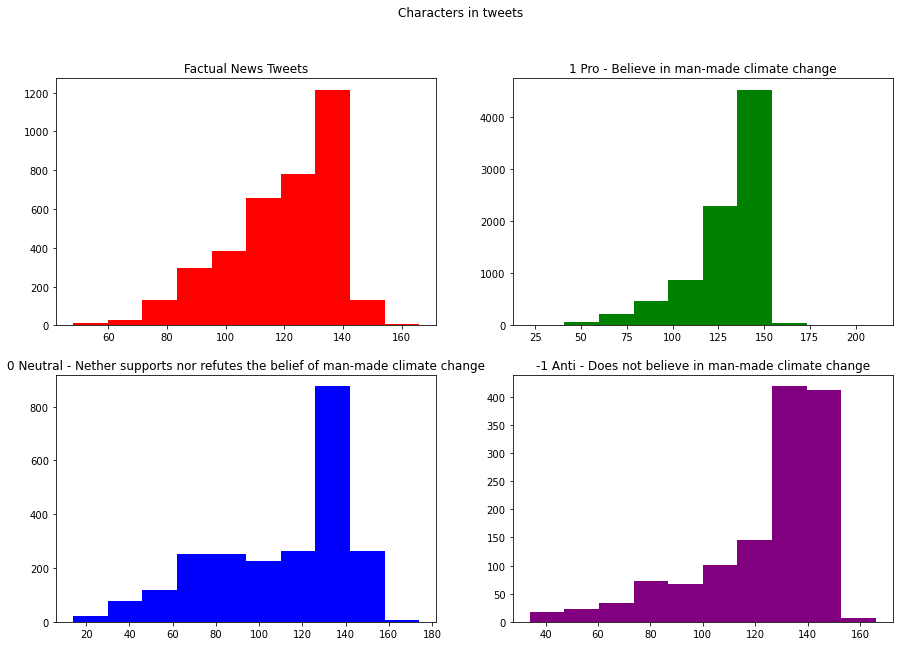

In [18]:
# function to plot the character _ distribution
def caracter_level_distrubtion (train): 
    fig,((ax1, ax2), (ax3, ax4)) =plt.subplots(2,2,figsize=(15,10))
    
    tweet_len=train[train['sentiment']==2]['message'].str.len() 
    ax1.hist(tweet_len,color='red')
    ax1.set_title('Factual News Tweets')
    
    tweet_len=train[train['sentiment']==1]['message'].str.len()
    ax2.hist(tweet_len,color='green')
    ax2.set_title('1 Pro - Believe in man-made climate change')
    
    tweet_len=train[train['sentiment']==0]['message'].str.len()
    ax3.hist(tweet_len,color='blue')
    ax3.set_title('0 Neutral - Nether supports nor refutes the belief of man-made climate change')
    
    tweet_len=train[train['sentiment']==-1]['message'].str.len()
    ax4.hist(tweet_len,color='purple')
    ax4.set_title('-1 Anti - Does not believe in man-made climate change')
    
    
    fig.suptitle('Characters in tweets')
    plt.show()
    

caracter_level_distrubtion(train_df)

### Word level distribution

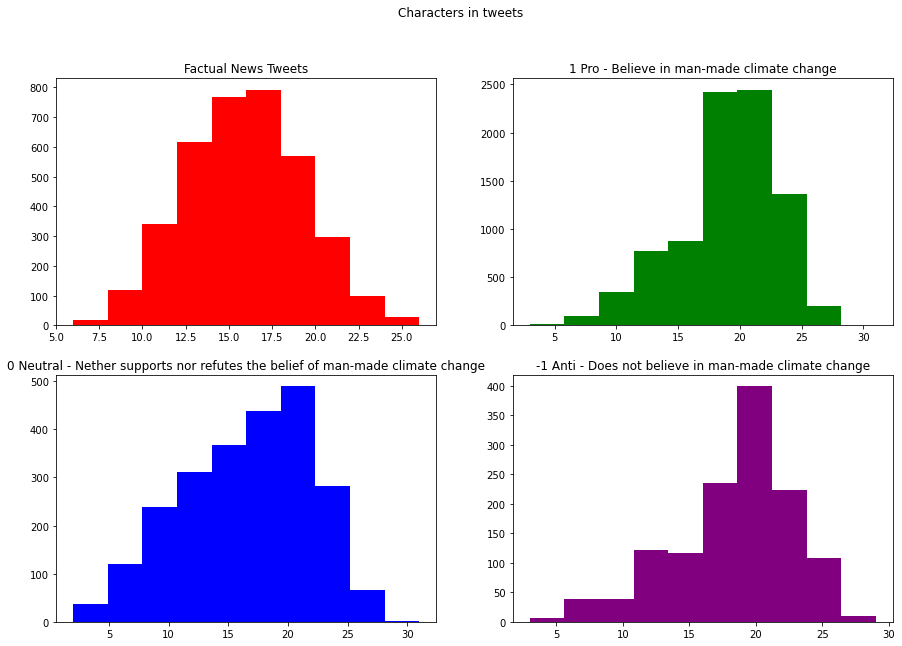

In [19]:
# function to plot the word level distrubtion
def word_level_distrubtion (train): 
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,10))
    tweet_len=train[train['sentiment']==2]['message'].str.split().map(lambda x: len(x))
    ax1.hist(tweet_len,color='red')
    ax1.set_title('Factual News Tweets')
    
    tweet_len=train[train['sentiment']==1]['message'].str.split().map(lambda x: len(x))
    ax2.hist(tweet_len,color='green')
    ax2.set_title('1 Pro - Believe in man-made climate change')
    
    tweet_len=train[train['sentiment']==0]['message'].str.split().map(lambda x: len(x))
    ax3.hist(tweet_len,color='blue')
    ax3.set_title('0 Neutral - Nether supports nor refutes the belief of man-made climate change')
    
    tweet_len=train[train['sentiment']==-1]['message'].str.split().map(lambda x: len(x))
    ax4.hist(tweet_len,color='purple')
    ax4.set_title('-1 Anti - Does not believe in man-made climate change')
    
    fig.suptitle('Characters in tweets')
    plt.show()
    
    
word_level_distrubtion(train_df)

#### Word Cloud

#### Let's plot the word cloud for all for different sentimentals tweets

* **Neutral tweets:** The words like "climate change", "global warming" and "https" appear to be big which means that they are mosst coomon words in our neutral tweets.
* **Anti Tweets:** Donald Trump appears a lot here. He is probably one of the people who do not believe in global warming. Also words like blame and scam are probably unique in here.
* **News Tweets:** Words like "https" appear a lot. Which probably means the news tweets always reference with a website. 
* **Pro Tweets:** words like "tackle climate","change" are probably unique in here too. 

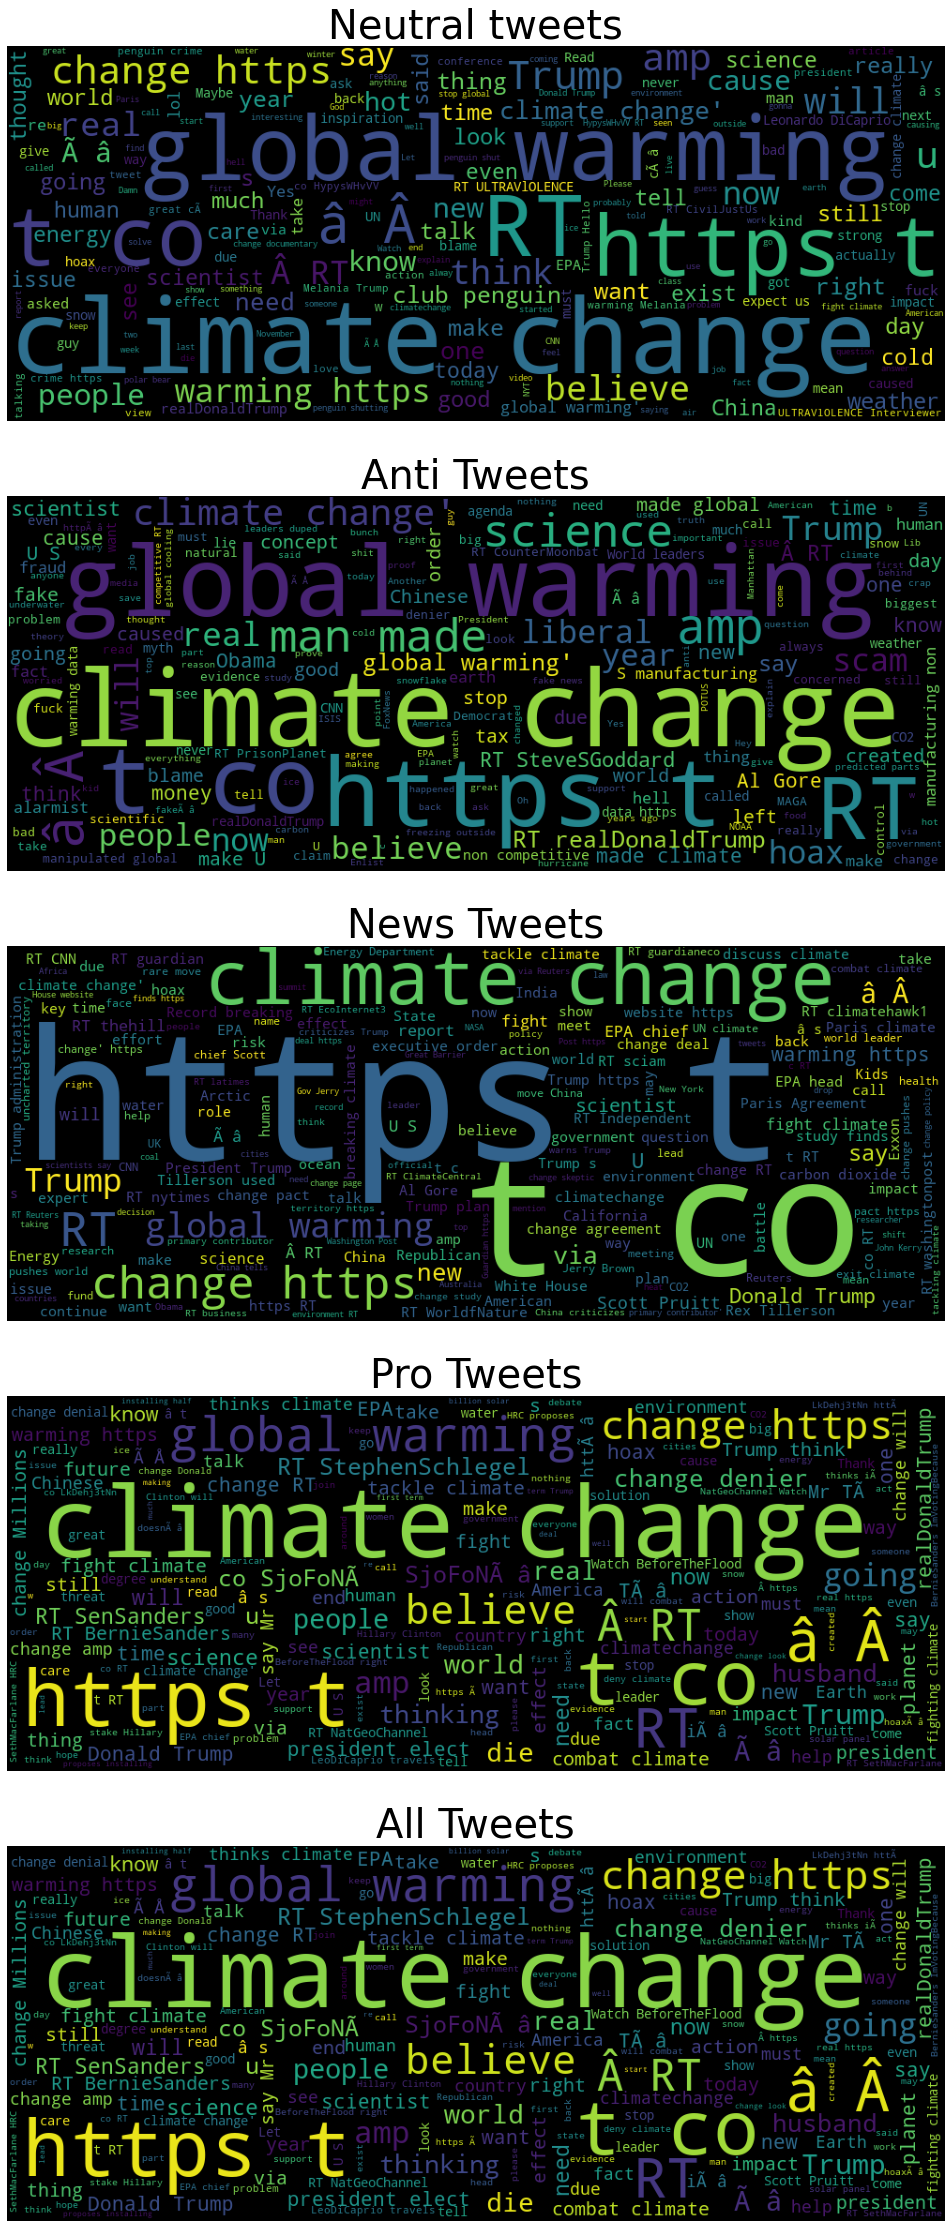

In [20]:
from wordcloud import WordCloud
def WordCloud_plotting (train): 
    news_tweets = train[train['sentiment']==2]['message']
    Pro_tweets = train[train['sentiment']==1]['message']
    neutral_tweets = train[train['sentiment']==0]['message']
    anti_tweets = train[train['sentiment']==-1]['message']
    alll = train['message']
    
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(5, 1, figsize=[50, 40])
    wordcloud1 = WordCloud( background_color='black',
                          width=1000,
                          height=400).generate(" ".join(neutral_tweets)) 

    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('Neutral tweets',fontsize=40);
    # anti
    wordcloud2 = WordCloud( background_color='black',
                          width=1000,
                          height=400).generate(" ".join(anti_tweets)) 

    ax2.imshow(wordcloud2)
    ax2.axis('off')
    ax2.set_title('Anti Tweets',fontsize=40)
    #news
    wordcloud3 = WordCloud( background_color='black',
                          width=1000,
                          height=400).generate(" ".join(news_tweets)) 

    ax3.imshow(wordcloud3)
    ax3.axis('off')
    ax3.set_title('News Tweets',fontsize=40);
    # pro
    wordcloud4 = WordCloud( background_color='black',
                          width=1000,
                          height=400).generate(" ".join(Pro_tweets)) 

    ax4.imshow(wordcloud4)
    ax4.axis('off')
    ax4.set_title('Pro Tweets',fontsize=40)
    #all
    wordcloud5 = WordCloud( background_color='black',
                          width=1000,
                          height=400).generate(" ".join(alll)) 

    ax5.imshow(wordcloud4)
    ax5.axis('off')
    ax5.set_title('All Tweets',fontsize=40);



WordCloud_plotting(train_df)

####  Punctuation Frequency

#### The "-" punctuation is used a lot in our tweets then "|" is the second most used.

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 264658.79it/s]


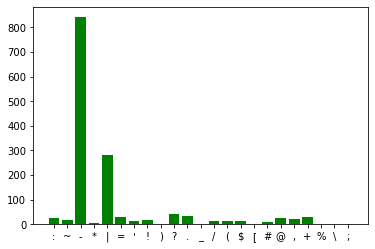

In [21]:
# function to return a dictionnary of punctuation_frequency
def punctuation_frequence(df) : 
    punct =defaultdict(int)
    for word in (List_of_words(df)):
        if word in special:
            punct[word]+=1
    return(punct)

# function to plot a barplot of punctuation
def punct_barplot (punct) : 
    x,y=zip(*punct.items())
    plt.bar(x,y,color='green')
    
punct = punctuation_frequence(train_df)
punct_barplot(punct)

####  Most Common Words

#### "Climate", "RT","change" and "global" are the most common words from our tweets. This makes sense since it corresponds with our word clouds

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 239870.77it/s]


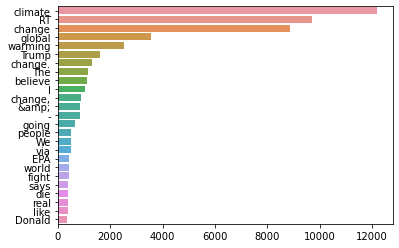

In [22]:
# function to return the most common words
def most_common (df):
    counter=Counter(List_of_words(df))
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:70]: 
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x) 
    
most_common(train_df)

####  Plotting Most Frequent N-grams

#### Here we just plot the N-grams of our tweets. But for now we will only plot the most common(i.e bigrams). 
#### So from bi-grams diagrams we can see that "climate change" is the most in our tweets.

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 881021.05it/s]


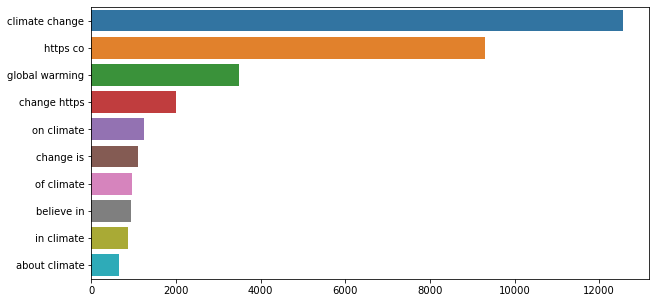

In [23]:
# function to return the top n grams tweets
from sklearn.feature_extraction.text import CountVectorizer
def get_top_tweet_ngrams(corpus,n_gram,lenght): 
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(corpus) 
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:lenght]

# function to graph the top n grams tweets
def plotting_top_ngrams (df): 
    plt.figure(figsize=(10,5))
    top_tweet_bigrams=get_top_tweet_ngrams(df['message'],2,10)[:10]
    x,y=map(list,zip(*top_tweet_bigrams))
    sns.barplot(x=y,y=x)
    
get_top_tweet_ngrams(List_of_tweets(train_df),2,10)
plotting_top_ngrams(train_df)

####  Looking at  the most common hashtags

Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

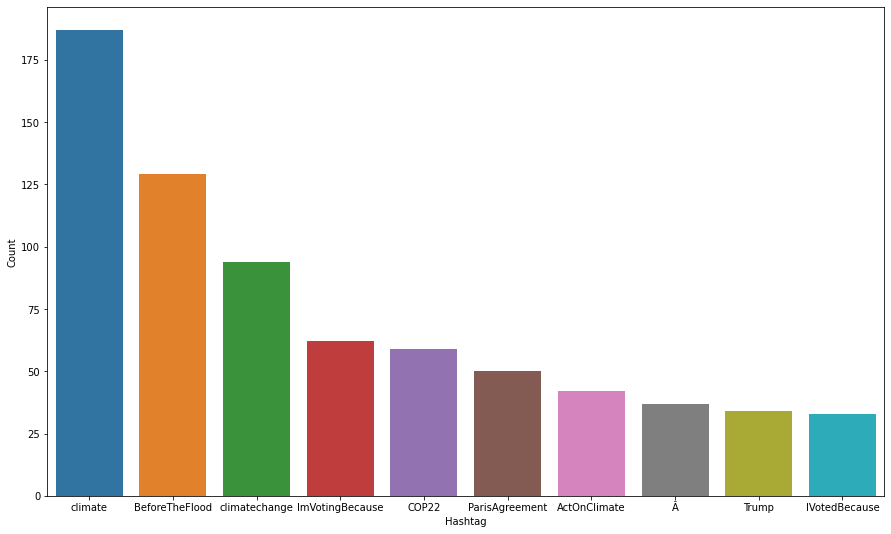

In [24]:
#tokenize
tokenized_tweet = train_df['message'].apply(lambda x: x.split())

##extract hashtahgs
def hashtag_extract(tweets):
    hashtags = []
    ###loop words in tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

##extract sentiment tweets
ht_positive = hashtag_extract(train_df['message'][train_df['sentiment']==1])
ht_factual = hashtag_extract(train_df['message'][train_df['sentiment']==2])
ht_negative = hashtag_extract(train_df['message'][train_df['sentiment']==-1])
ht_neutral = hashtag_extract(train_df['message'][train_df['sentiment']==0])

##unest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_factual = sum(ht_factual, [])
ht_neutral = sum(ht_neutral, [])

freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                 'Count': list(freq.values())})

##select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x= 'Hashtag', y = 'Count')

## Observations

- Climate is most the used hashtag in our data
- Most of the people believe in man-made climate change

### Tweet length distribution

In [78]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=train_df['sentiment'], y=train_df['length'], data=train_df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

KeyError: 'length'

# <u><b> DATA CLEANING

In [25]:
#Combine Train and Test data set
df_all = concat_df(train_df,test_df)

#### As we know,twitter tweets always have to be cleaned before we go onto modelling. So we will do some basic cleaning such as removing punctuations,removing html tags and emojis etc. So let's start.

In [26]:
def rem2(text) : 
    from nltk.tokenize import TweetTokenizer
    tknzr = TweetTokenizer(strip_handles=True)
    text = text.lower()
    text = ' '.join(tknzr.tokenize(text))
    return (text)

#remove stop words
def remove_stops(text) : 
    remove_stopwords = [w for w in text.split() if w not in stop]
    return ' '.join(remove_stopwords)

# remove URLs
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# remove htmls
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# remove punct
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

# remove other ...
def remove_other (text) : 
    text = text.lower()
    text = text.replace("'", "")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return(text)

In [27]:
#full clean
df_all['cleaned_message_T'] = df_all['message'].apply(lambda x: remove_stops(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_URL(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_punct(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_html(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_emoji(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: rem2(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_stops(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_URL(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_punct(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_html(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_emoji(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x: remove_other(x))
df_all

,message,sentiment,tweetid,cleaned_message_T
0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",1.0,625221,polyscimajor epa chief think carbon dioxide main cause global warming wait via mashable
1,It's not like we lack evidence of anthropogenic global warming,1.0,126103,like lack evidence anthropogenic global warming
2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,2.0,698562,rt rawstory researchers say three years act climate change ’ late
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,1.0,573736,todayinmaker wired pivotal year war climate change
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",1.0,466954,rt soynoviodetodas racist sexist climate change denying bigot leading polls electionnight
...,...,...,...,...
26360,"RT @BrittanyBohrer: Brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/RpUs…",NaN,895714,rt brittanybohrer brb writing poem climate change climatechange science poetry fakenews alternativefacts
26361,"2016: the year climate change came home: During the hottest year on record, Karl Mathiesen travelled to Tasmania… https://t.co/WwSrJQfvMg",NaN,875167,year climate change came home hottest year record karl mathiesen travelled tasmania …
26362,RT @loop_vanuatu: Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd,NaN,78329,rt loopvanuatu pacific countries positive fiji leading global climate change conference november
26363,"RT @xanria_00018: You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove @jophie30 @asn585",NaN,867455,rt xanria ’ hot must cause global warming aldublaboroflove jophie asn


#### <u><b> Stemmer/Lemmer

Stemming will not convert original words into meaningful words. As you can see “considered” gets stemmed into “condit” which does not have meaning and a spelling mistake too. The better way is to use Lemmatization instead of stemming process.

Lemmatization is a more powerful operation, and it takes into consideration the morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms.

In [28]:
# function to stemm the text
def stemming (text) : 
    stemmer = nltk.stem.PorterStemmer()
    return(" ".join(stemmer.stem(word) for word in text.split()))

# function to lemm a text 
def lemming (text) : 
    lemmatizer=nltk.stem.WordNetLemmatizer()
    return(" ".join(lemmatizer.lemmatize(word) for word in text.split()))


In [29]:
#So we will choose lemmer
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x : lemming(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x : stemming(x))
df_all['cleaned_message_T'] = df_all['cleaned_message_T'].replace(to_replace="'",value="",regex =True)
df_all

,message,sentiment,tweetid,cleaned_message_T
0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",1.0,625221,polyscimajor epa chief think carbon dioxid main caus global warm wait via mashabl
1,It's not like we lack evidence of anthropogenic global warming,1.0,126103,like lack evid anthropogen global warm
2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,2.0,698562,rt rawstori research say three year act climat chang ’ late
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,1.0,573736,todayinmak wire pivot year war climat chang
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",1.0,466954,rt soynoviodetoda racist sexist climat chang deni bigot lead poll electionnight
...,...,...,...,...
26360,"RT @BrittanyBohrer: Brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/RpUs…",NaN,895714,rt brittanybohr brb write poem climat chang climatechang scienc poetri fakenew alternativefact
26361,"2016: the year climate change came home: During the hottest year on record, Karl Mathiesen travelled to Tasmania… https://t.co/WwSrJQfvMg",NaN,875167,year climat chang came home hottest year record karl mathiesen travel tasmania …
26362,RT @loop_vanuatu: Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd,NaN,78329,rt loopvanuatu pacif countri posit fiji lead global climat chang confer novemb
26363,"RT @xanria_00018: You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove @jophie30 @asn585",NaN,867455,rt xanria ’ hot must caus global warm aldublaboroflov jophi asn


# <u><b> FEATURE EXTRACTORS

#### The data clean phase is over. We can now separate the train and test. We use divide_df for that

In [30]:
train_df , test_df = divide_df(df_all,train_df.shape[0])

# <u><b>Spitting Our Dataset into Training And Testing Dataset

In [31]:
train,valid = train_test_split(train_df,test_size = 0.2,random_state=0,stratify = train_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (12655, 4)
valid shape :  (3164, 4)


### We can then proceed to the feature extraction phase. We will use 1 Feature extractors 
* **CountVectorizer**
#### CountVectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop,ngram_range=(1, 2))

X_train = vectorizer.fit_transform(train.cleaned_message_T.values)
X_test = vectorizer.transform(valid.cleaned_message_T.values)


X_test_data = test_df['cleaned_message_T']#test dataset
XT = vectorizer.transform(X_test_data.values)

y_train = train.sentiment.values
y_test = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)
print("XT.shape : ", XT.shape)

X_train.shape :  (12655, 86225)
X_test.shape :  (3164, 86225)
y_train.shape :  (12655,)
y_test.shape :  (3164,)
XT.shape :  (10546, 86225)


# <u><b> MODEL(S)

# <u><b> 1. Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = f1_score(y_test,NB_prediction, average='weighted')

print("Training accuracy Score: ", naiveByes_clf.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print("\nClassification report: \n" ,classification_report(NB_prediction,y_test))

Training accuracy Score:  0.9422362702489134
Testing accuracy Score :  0.6594351832478148

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.20      0.96      0.33        53
         0.0       0.18      0.92      0.30        91
         1.0       0.95      0.67      0.78      2420
         2.0       0.66      0.80      0.72       600

    accuracy                           0.70      3164
   macro avg       0.49      0.84      0.53      3164
weighted avg       0.86      0.70      0.75      3164



# <u><b> 2. Stochastic Gradient Descent-SGD Classifier 

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = f1_score(y_test,sgd_prediction, average='weighted')

print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Testing accuracy Score : ",sgd_accuracy )

print("Classification report: \n" ,classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.998340576847096
Testing accuracy Score :  0.7299894527009705
Classification report: 
               precision    recall  f1-score   support

        -1.0       0.44      0.79      0.57       144
         0.0       0.39      0.63      0.49       293
         1.0       0.89      0.76      0.82      2006
         2.0       0.73      0.74      0.74       721

    accuracy                           0.74      3164
   macro avg       0.62      0.73      0.65      3164
weighted avg       0.79      0.74      0.76      3164



# <u><b> 3. RANDOM FOREST CLASSIFIER

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = f1_score(y_test,rf_prediction, average='weighted')

print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print("Classification report: \n" ,classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9988146977479258
Testing accuracy Score :  0.6750355065497479
Classification report: 
               precision    recall  f1-score   support

        -1.0       0.26      0.77      0.39        88
         0.0       0.32      0.64      0.43       233
         1.0       0.91      0.68      0.78      2276
         2.0       0.61      0.78      0.69       567

    accuracy                           0.70      3164
   macro avg       0.53      0.72      0.57      3164
weighted avg       0.80      0.70      0.73      3164



# <u><b> 4. Extreme Gradient Boosting

In [36]:
xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = f1_score(y_test,xgb_prediction, average='weighted')

print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Testing accuracy Score : ",xgb_accuracy )

print("Classification report: \n" ,classification_report(xgb_prediction,y_test))

[10:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.771473725800079
Testing accuracy Score :  0.6774997482459438
Classification report: 
               precision    recall  f1-score   support

        -1.0       0.35      0.81      0.49       112
         0.0       0.31      0.66      0.42       217
         1.0       0.91      0.69      0.78      2247
         2.0       0.60      0.74      0.66       588

    accuracy                           0.70      3164
   macro avg       0.54      0.73      0.59      3164
weighted avg       0.79      0.70      0.73      3164



# <u><b> 5. Support Vector Machine

In [37]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = f1_score(y_test,svc_prediction, average='weighted')

print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Testing accuracy Score : ",svc_accuracy )

print("Classification report: \n" ,classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9351244567364678
Testing accuracy Score :  0.7009913779095309
Classification report: 
               precision    recall  f1-score   support

        -1.0       0.28      0.89      0.43        82
         0.0       0.38      0.65      0.48       274
         1.0       0.86      0.74      0.80      1970
         2.0       0.77      0.67      0.72       838

    accuracy                           0.72      3164
   macro avg       0.57      0.74      0.60      3164
weighted avg       0.78      0.72      0.74      3164



# <u><b> 6. Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10,multi_class = 'ovr')

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = f1_score(y_test,logreg_prediction, average='weighted')

print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print("Classification report: \n" ,
      classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9987356775977875
Testing accuracy Score :  0.7332089740577757
Classification report: 
               precision    recall  f1-score   support

        -1.0       0.43      0.82      0.56       135
         0.0       0.42      0.64      0.51       312
         1.0       0.89      0.76      0.82      1993
         2.0       0.74      0.74      0.74       724

    accuracy                           0.75      3164
   macro avg       0.62      0.74      0.66      3164
weighted avg       0.79      0.75      0.76      3164



# <u><b> 7. CATBOOST MODEL 

In [39]:
#takes huge amount of time to execute

from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

catboost_prediction = clf2.predict(X_test)
catboost_accuracy = f1_score(y_test,catboost_prediction, average='weighted')
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Testing accuracy Score : ",catboost_accuracy )
print("Classification report: \n" ,classification_report(catboost_prediction,y_test))

KeyboardInterrupt: 

# <u><b> All The Multiclass Models Test Accuracy In Descending Order

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'F1_weighted': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='F1_weighted', ascending=False)

In [ ]:
sns.lineplot("Model", "F1_weighted", data=models)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

# <b><u> Create A Submission File

### create submission dataframe
### save DataFrame to csv file for submission

In [ ]:
test_pred = logreg.predict(XT) #using Logistic Regression

test_pred_int = test_pred.astype(np.int) #change data type to integer

test_df['sentiment'] = test_pred_int

submission = test_df[['tweetid','sentiment']]
submission.to_csv('submission.csv', index=False) # writing data to a CSV file
submission